<a href="https://colab.research.google.com/github/alifdoll/image-recognition/blob/main/submission_dicoding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nama : Muhammad Alifian Fajar Pratama


In [ ]:
import zipfile, os, shutil
import tensorflow as tf

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split

#library untuk file upload
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

In [ ]:
from keras.callbacks import Callback

class TerminateOnBaseline(Callback):
    def __init__(self, accuracy):
      super(TerminateOnBaseline, self).__init__()
      self.accuracy = accuracy

    def on_epoch_end(self, epoch, logs={}):
        acc = logs.get(self.accuracy)
        if (logs.get('accuracy') > 0.97):
                print('Mencapai batas latih, Menghentikan training')
                self.model.stop_training = True


In [ ]:
!wget --no-check-certificate \
      https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip \
      -O /tmp/rockpaperscissors.zip

--2020-11-02 08:26:11--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘/tmp/rockpaperscissors.zip’

/tmp/rockpapersciss 100%[===================>] 307.92M  5.49MB/s    in 46s     

2020-11-02 08:26:58 (6.64 MB/s) - ‘/tmp/rockpaperscissors.zip’ saved [322873683/322873683]



In [ ]:
local_zip = '/tmp/rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()



In [ ]:
base_dir = '/tmp/rockpaperscissors'

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'val')

rock_dir = os.path.join(base_dir,'rock')
papr_dir = os.path.join(base_dir, 'paper')
scis_dir = os.path.join(base_dir, 'scissors')

In [ ]:
train_rock = os.path.join(train_dir, 'rock')
train_papr = os.path.join(train_dir, 'paper')
train_scis = os.path.join(train_dir, 'scissors')

val_rock = os.path.join(validation_dir, 'rock')
val_papr = os.path.join(validation_dir, 'paper')
val_scis = os.path.join(validation_dir, 'scissors')

In [ ]:
os.makedirs(train_rock)
os.makedirs(train_papr)
os.makedirs(train_scis)

os.makedirs(val_rock)
os.makedirs(val_papr)
os.makedirs(val_scis)

In [ ]:
train_rock_dir, val_rock_dir = train_test_split(os.listdir(rock_dir), test_size=0.40)
train_papr_dir, val_papr_dir = train_test_split(os.listdir(papr_dir), test_size = 0.40)
train_scis_dir, val_scis_dir = train_test_split(os.listdir(scis_dir), test_size=0.40)

In [ ]:
for file in train_rock_dir:
  shutil.copy(os.path.join(rock_dir, file), os.path.join(train_rock, file))

for file in val_rock_dir:
  shutil.copy(os.path.join(rock_dir, file), os.path.join(val_rock, file))

for file in train_papr_dir:
  shutil.copy(os.path.join(papr_dir, file), os.path.join(train_papr, file))

for file in val_papr_dir:
  shutil.copy(os.path.join(papr_dir, file), os.path.join(val_papr, file))

for file in train_scis_dir:
  shutil.copy(os.path.join(scis_dir, file), os.path.join(train_scis, file))

for file in val_scis_dir:
  shutil.copy(os.path.join(scis_dir, file), os.path.join(val_scis, file))
  

In [ ]:
train_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 20,
    horizontal_flip=True,
    shear_range = 0.2,
    fill_mode = 'nearest'
)

test_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 20,
    horizontal_flip=True,
    vertical_flip = True,
    shear_range = 0.2,
    fill_mode = 'nearest'
)

In [ ]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150,150),
    batch_size=32,
    class_mode='categorical'
)

val_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150,150),
    batch_size=32,
    class_mode='categorical'
)

Found 1312 images belonging to 3 classes.
Found 876 images belonging to 3 classes.


In [ ]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32, (3,3), activation = 'relu', input_shape= (150,150,3)),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(64,(3,3), activation= 'relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(128,(3,3), activation= 'relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dropout(0.5),
  tf.keras.layers.Dense(512, activation= 'relu'),
  tf.keras.layers.Dense(3, activation= 'softmax')
])


model.compile(loss='categorical_crossentropy',
              optimizer=tf.optimizers.Adam(),
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
flatten (Flatten)            (None, 36992)             0

In [ ]:
model.fit(
    train_generator,
    steps_per_epoch = 41, # steps_per_epoch didapat dari n-images / batch_size
    epochs = 20,
    validation_data = val_generator,
    validation_steps = 27, 
    verbose = 2,
    callbacks=[TerminateOnBaseline(accuracy=0.97)]
)

Epoch 1/20
41/41 - 77s - loss: 1.0038 - accuracy: 0.5046 - val_loss: 0.7632 - val_accuracy: 0.7014
Epoch 2/20
41/41 - 77s - loss: 0.5679 - accuracy: 0.7790 - val_loss: 0.4658 - val_accuracy: 0.8275
Epoch 3/20
41/41 - 76s - loss: 0.3212 - accuracy: 0.8788 - val_loss: 0.2862 - val_accuracy: 0.8958
Epoch 4/20
41/41 - 77s - loss: 0.1946 - accuracy: 0.9360 - val_loss: 0.2678 - val_accuracy: 0.9062
Epoch 5/20
41/41 - 81s - loss: 0.1710 - accuracy: 0.9459 - val_loss: 0.2930 - val_accuracy: 0.9005
Epoch 6/20
41/41 - 76s - loss: 0.1783 - accuracy: 0.9398 - val_loss: 0.2047 - val_accuracy: 0.9317
Epoch 7/20
41/41 - 76s - loss: 0.1087 - accuracy: 0.9688 - val_loss: 0.1666 - val_accuracy: 0.9410
Epoch 8/20
Mencapai batas latih, Menghentikan training
41/41 - 77s - loss: 0.0722 - accuracy: 0.9756 - val_loss: 0.1748 - val_accuracy: 0.9421


Saving 20201102_104915-removebg-preview(1).jpg to 20201102_104915-removebg-preview(1) (1).jpg
20201102_104915-removebg-preview(1).jpg
Gunting


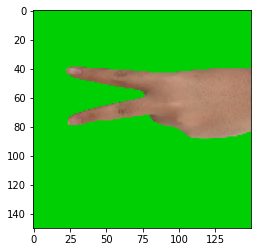

In [ ]:
uploaded = files.upload()
 
for fn in uploaded.keys():
 
  # predicting images
  path = fn 
  img = image.load_img(path, target_size =(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  
  print(fn)
  
  if(classes[0,0] == 1):
    print("Kertas")
  elif(classes [0,1] == 1):
    print("Batu")
  else:
    print("Gunting")
  